In [2]:
import os
from re import sub
from collections import defaultdict
from matplotlib import pyplot as plt

ISO_BOOKS_DIR = 'Brazilian_Portugese_Corpus/'
ISO_BOOKS = list(os.walk(ISO_BOOKS_DIR))[0][2]
UTF8_BOOKS_DIR = 'corpus/'

In [113]:
def get_utf8_books():
    if not os.path.isdir(UTF8_BOOKS_DIR):
        os.mkdir(UTF8_BOOKS_DIR)

    for book in ISO_BOOKS:
        book = book.replace(' ', '\ ')
        os.system(f'iconv -f ISO-8859-1 -t UTF-8 {ISO_BOOKS_DIR}/{book} -o {UTF8_BOOKS_DIR}/{book}')

    return list(os.walk(UTF8_BOOKS_DIR))[0][2]

def get_words(book):
    with open(UTF8_BOOKS_DIR + book, 'r') as file:
        text = file.readlines()

    text = ''.join(text)
    text = text.replace('\n',' ')
    text = sub('[ -;!?,:`~_@=<>|*#&%$\\xad\\x0c\\x91\\x92\\x93\\x94\\x95\\x96\\x97\[\]]+', ' ', text)
    words = [word.lower() for word in text.split()]
    return words

def count_words(words, count):
    for word in words:
        count[word] += 1

    return count

def sort_tuple(tup): 
    tup.sort(reverse=True, key = lambda x: x[1]) 
    return tup 

def top_10_words(counted):
    counted = list(counted.items())
    most_repeated_words = sort_tuple(counted)
    return most_repeated_words[:10]

def plot_log(count: dict, title: str):
    values = list(count.values())
    values.sort(reverse=True)
    fig = plt.figure() 
    ax = fig.add_subplot(1,1,1)
    ax.set_title(title)
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.plot(values)

def plot_histogram(counted, title):
    x, y = zip(*counted)
    plt.bar(x, y, color='b')
    plt.title(title)
    plt.xticks(x, x, rotation='vertical')
    plt.tight_layout()
    plt.show()

In [26]:
books = get_utf8_books()

if books != ISO_BOOKS:
    raise("Not collected all books")

count = defaultdict(lambda: 0)

for book in books:
    count = count_words(get_words(book), count)

words_counted = dict(count)

In [17]:
prefix = dict()
sufix = dict()

for k in range(6):
    prefix[k] = [ x[:k] for x in count if len(x) >= k ]
    sufix[k] = [ x[-k:] for x in count if len(x) >= k ]

In [40]:
prefix_counted = list()
sufix_counted = list()

for k in range(6):
    prefix_counted.append(defaultdict(lambda: 0))
    prefix_counted[k] = count_words(prefix[k], prefix_counted[k])
    prefix_counted[k] = dict(prefix_counted[k])
    
    sufix_counted.append(defaultdict(lambda: 0))
    sufix_counted[k] = count_words(sufix[k], sufix_counted[k])
    sufix_counted[k] = dict(sufix_counted[k])

In [116]:
len(words_counted.keys())

87137

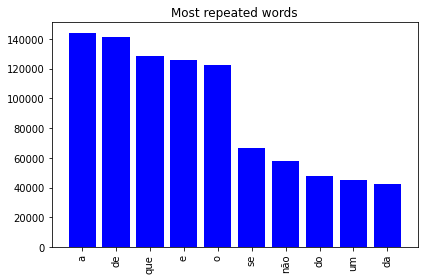

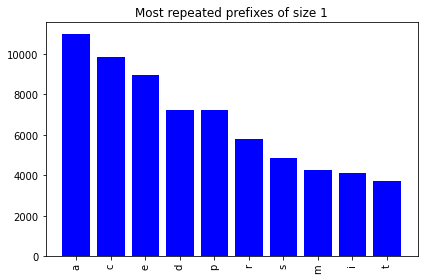

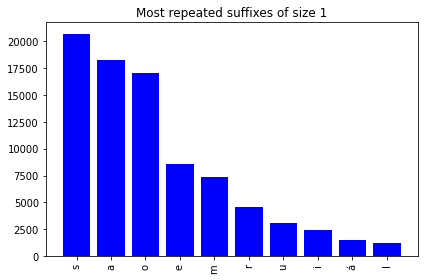

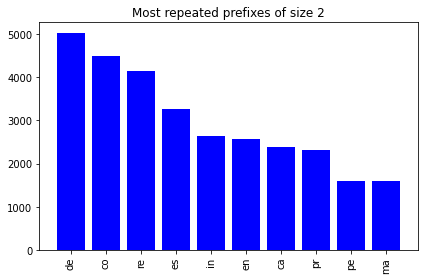

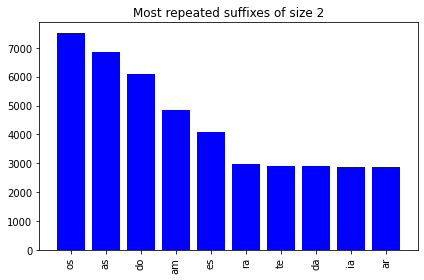

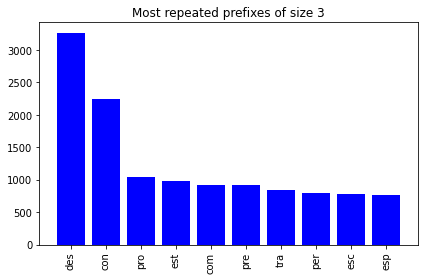

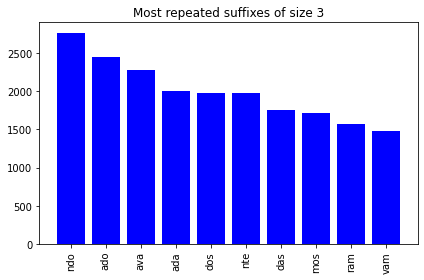

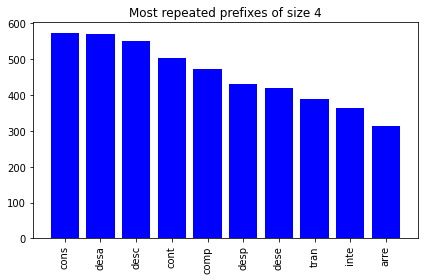

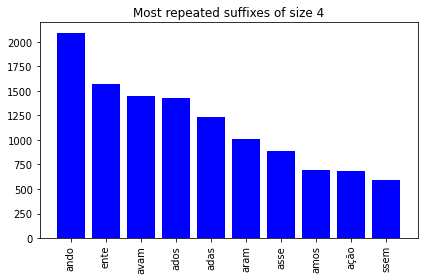

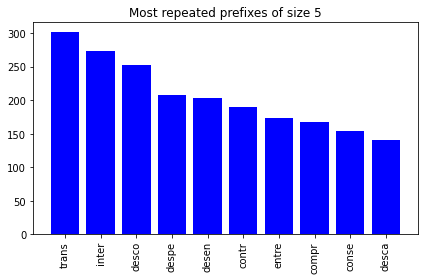

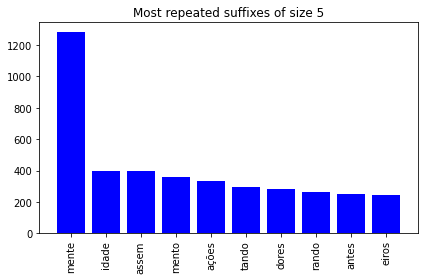

In [114]:
all_words = top_10_words(words_counted)
plot_histogram(all_words, "Most repeated words")

for k in range(1,6):
    plot_histogram(top_10_words(prefix_counted[k]), "Most repeated prefixes of size " + str(k))
    plot_histogram(top_10_words(sufix_counted[k]), "Most repeated suffixes of size " + str(k))

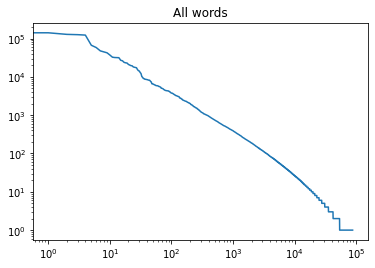

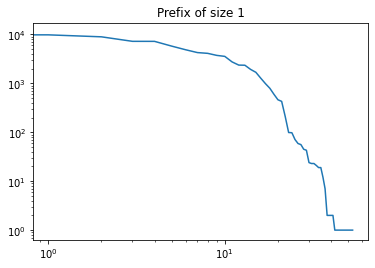

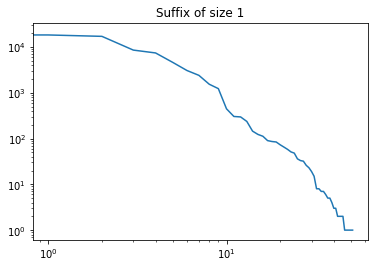

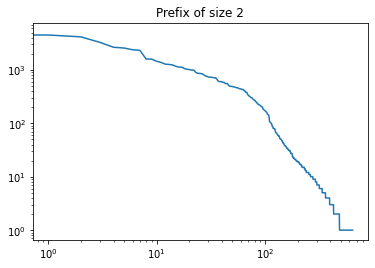

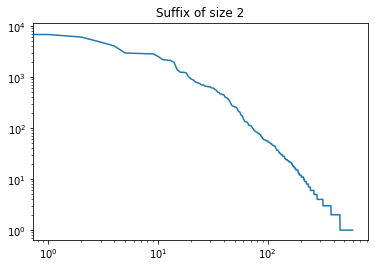

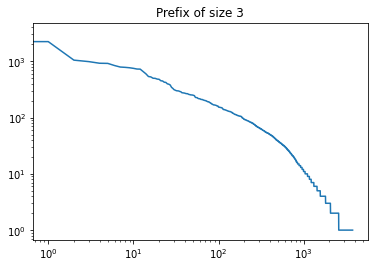

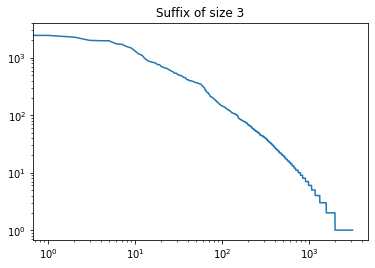

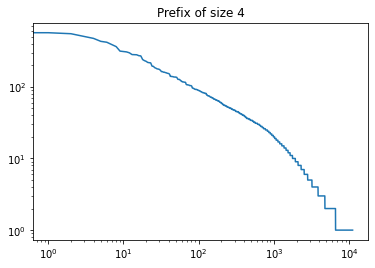

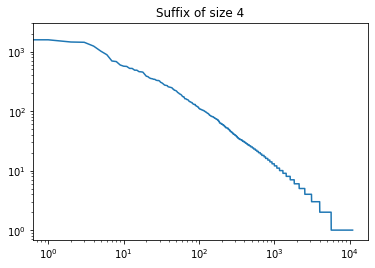

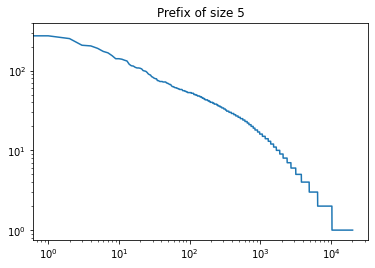

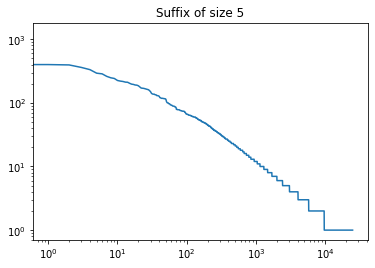

In [57]:
plot_log(words_counted, "All words")

for k in range(1,6):
    plot_log(prefix_counted[k], "Prefix of size " + str(k))
    plot_log(sufix_counted[k], "Suffix of size " + str(k))
    